In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import matplotlib.pyplot as plt

In [3]:
from environment import BananaEnv
from experiment import Experiment
from agent import DqnAgent
from replay_buffer import ReplayBuffer
from model import DqnModel
from strategy import *
from plots import *

INFO:numexpr.utils:Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Experiment
For an experiment we need an agent and an environment.

- agent - there is only one implementation - `DqnAgent`
- environment - there is only one implementation - `BananaEvn`

### The environment

In [4]:
path_to_unity_binary = 'Banana_Linux_NoVis/Banana.x86_64'
env = BananaEnv(path_to_unity_binary)

Found path: /home/p.bazan/sources/udacity_drl/p1_navigation/Banana_Linux_NoVis/Banana.x86_64
Mono path[0] = '/home/p.bazan/sources/udacity_drl/p1_navigation/Banana_Linux_NoVis/Banana_Data/Managed'
Mono config path = '/home/p.bazan/sources/udacity_drl/p1_navigation/Banana_Linux_NoVis/Banana_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/p.bazan/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### The agent
DqnAgent requires several things:
- model - a pytorch model -> `DqnModel`
- memory - a reply buffer -> `ReplyBuffer`
- train_strategy - one of the strategies like `LinearEpsilonGreedyStrategy` or `ExponentialEpsilonGreedyStrategy`

## The DQN experiment

#### The model consists of:

- input layer
- hidden layers
- output layer
   
All layers except last one have activation function RELU

In [5]:
model = DqnModel(input_dim=env.nS, output_dim=env.nA, hidden_dims=(64, 64))

In [6]:
model

DqnModel(
  (layers): ModuleList(
    (0): Linear(in_features=37, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)

#### Memory is a reply buffer with limited size

In [7]:
memory = ReplayBuffer(max_size=50_000)

#### Agent requires training and evaluation strategy.

- for training we have two options: `LinearEpsilonGreedyStrategy` or `ExponentialEpsilonGreedyStrategy`
- for evaluation - there should be `GreedyStrategy`

In [8]:
train_strategy = ExponentialEpsilonGreedyStrategy(eps_start=1., eps_min=.1, decay=.99)

We can check epsilon with respect to episodes

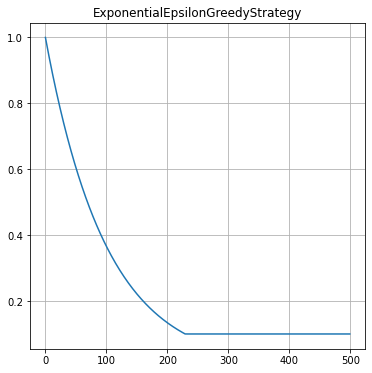

In [9]:
train_strategy.display(500)

#### Agent has two models

- online model
- target model


Hyperparameters:
    
- `gamma` - discounted reward factor
- `batch_size` - how many samples to train at once
- `lr` - learning rate
- `train_every_steps` - how often we want to train model
- `updatet_target_every_steps` - how often we copy online model to target model
- `tau` - factor for updating target model. When `tau=1` there is a copy of weights. When `tau < 1` there is a Polyak averaging

In [10]:
dqn_agent = DqnAgent(model, memory, train_strategy, ddqn=False, gamma=.95, batch_size=64, lr=5e-4, train_every_steps=4, update_target_every_steps=4, tau=.01)

#### Experiment
Has `train` and `evalute` methods. After training it also contains `history` object

In [11]:
dqn_exp = Experiment(env, dqn_agent)

In [12]:
dqn_exp.train(episodes=1000)

/home/p.bazan/miniconda3/envs/pydrl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/p.bazan/miniconda3/envs/pydrl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode: 325, score: 14.000, avg_score: 12.9, agent_avg_loss: 0.016, epsilon: 0.100Agent passed grading achieving min score:3.0, mean score: 13.02


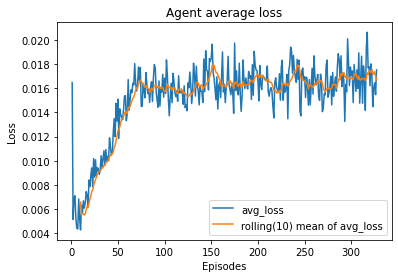

In [22]:
plot_loss(dqn_exp.history)

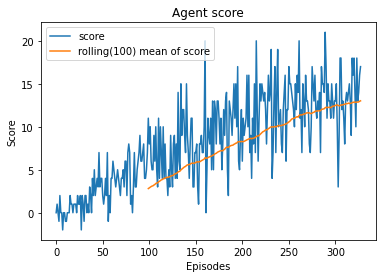

In [23]:
plot_score(dqn_exp.history)

#### Store best model

In [20]:
dqn_exp.store('dqn_exp')

In [12]:
dqn_exp.load('dqn_exp')

#### Evaluate

In [13]:
dqn_exp.evaluate(100)

/home/p.bazan/miniconda3/envs/pydrl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/p.bazan/miniconda3/envs/pydrl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode: 0, score: 3.000, avg_score: 3.0, agent_avg_loss: nan, epsilon: 1.000

KeyboardInterrupt: 

## The DDQN experiment

In [ ]:
ddqn_agent = DqnAgent(model, memory, train_strategy, ddqn=True, gamma=.95, batch_size=64, lr=5e-4, train_every_steps=4, update_target_every_steps=4, tau=.01)

In [40]:
ddqn_exp = Experiment(env, ddqn_agent)

In [ ]:
ddqn_exp.train(episodes=1000)

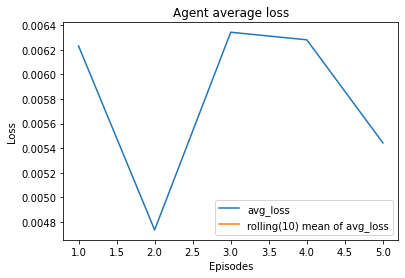

In [38]:
plot_loss(ddqn_exp.history)

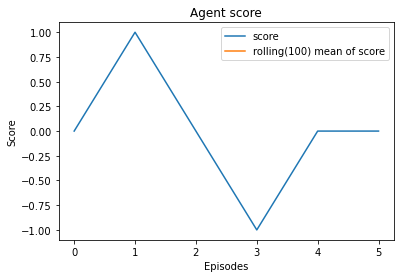

In [39]:
plot_score(ddqn_exp.history)